### Linear Regression - Insurance Price Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./insurance[1].csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
X = df.iloc[::, 0:6:]
Y = df.iloc[::, 6:7:]

In [4]:
X1 = pd.get_dummies(X, columns=['region'], drop_first=True, dtype=int)
X1.sex = X1.sex.map({'male':1, 'female':0})
X1.smoker = X1.smoker.map({'yes':1, 'no':0})


In [5]:
X1

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [7]:
predictionModel =  LinearRegression()

In [8]:
predictionModel.fit(x_train, y_train)

LinearRegression()

In [9]:
NewY = predictionModel.predict(x_test)
NewY

array([[ 8969.55027444],
       [ 7068.74744287],
       [36858.41091155],
       [ 9454.67850053],
       [26973.17345656],
       [10864.11316424],
       [  170.28084136],
       [16903.45028662],
       [ 1092.43093614],
       [11218.34318352],
       [28101.68455267],
       [ 9377.73460205],
       [ 5263.0595179 ],
       [38416.04221107],
       [40255.82339284],
       [37098.25353123],
       [15240.39392306],
       [35912.88264434],
       [ 9112.52398703],
       [31461.92108909],
       [ 3847.68845883],
       [10130.12001517],
       [ 2370.54189389],
       [ 7140.21550828],
       [11301.76782638],
       [12961.65366224],
       [14509.47251876],
       [ 6159.8976107 ],
       [ 9963.85857263],
       [ 2177.85718217],
       [ 9115.93673494],
       [13073.68932159],
       [ 4561.82376202],
       [ 3408.20756033],
       [ 4459.81359745],
       [13032.06505076],
       [ 1979.99357292],
       [ 8813.28303302],
       [33271.29124448],
       [32585.51583927],


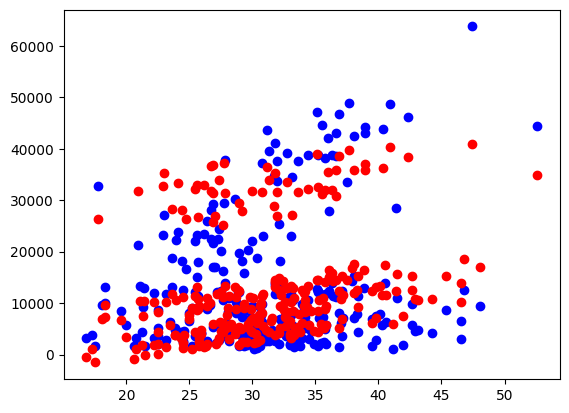

In [10]:
plt.scatter(x_test['bmi'], y_test, color='blue', label='Actual')
plt.scatter(x_test['bmi'], NewY, color='red', label='Predicted')

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, NewY)
mse = mean_squared_error(y_test, NewY)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.7835929767120724
Mean Squared Error: 33596915.85136145


In [12]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Try to improve accuracy of model by using Polynomial regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X1)

poly_model = LinearRegression()
poly_model.fit(X_poly, Y)

LinearRegression()

In [14]:
poly_model.fit(x_train, y_train)

LinearRegression()

In [15]:
PolyNewY = predictionModel.predict(x_test)
PolyNewY

array([[ 8969.55027444],
       [ 7068.74744287],
       [36858.41091155],
       [ 9454.67850053],
       [26973.17345656],
       [10864.11316424],
       [  170.28084136],
       [16903.45028662],
       [ 1092.43093614],
       [11218.34318352],
       [28101.68455267],
       [ 9377.73460205],
       [ 5263.0595179 ],
       [38416.04221107],
       [40255.82339284],
       [37098.25353123],
       [15240.39392306],
       [35912.88264434],
       [ 9112.52398703],
       [31461.92108909],
       [ 3847.68845883],
       [10130.12001517],
       [ 2370.54189389],
       [ 7140.21550828],
       [11301.76782638],
       [12961.65366224],
       [14509.47251876],
       [ 6159.8976107 ],
       [ 9963.85857263],
       [ 2177.85718217],
       [ 9115.93673494],
       [13073.68932159],
       [ 4561.82376202],
       [ 3408.20756033],
       [ 4459.81359745],
       [13032.06505076],
       [ 1979.99357292],
       [ 8813.28303302],
       [33271.29124448],
       [32585.51583927],


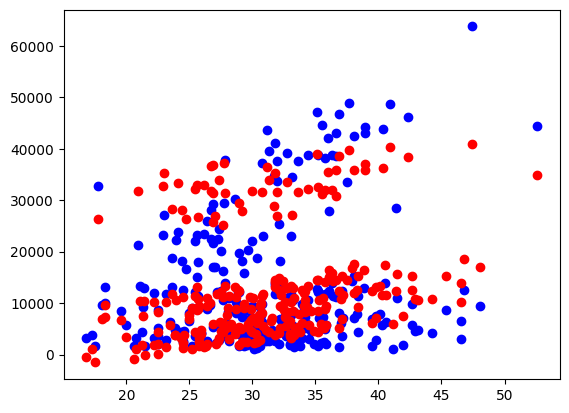

In [16]:
plt.scatter(x_test['bmi'], y_test, color='blue', label='Actual')
plt.scatter(x_test['bmi'], PolyNewY, color='red', label='Predicted')

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, PolyNewY)
mse = mean_squared_error(y_test, PolyNewY)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.7835929767120724
Mean Squared Error: 33596915.85136145


In [17]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X1, Y)

Ridge()

In [18]:
RidgeNewY = ridge_model.predict(x_test)
RidgeNewY

array([[ 9122.98710804],
       [ 7155.0763453 ],
       [37020.9670709 ],
       [ 9576.52046769],
       [27047.5064853 ],
       [10753.55171222],
       [  245.74463886],
       [16893.74974703],
       [ 1133.72608625],
       [11345.10691277],
       [28145.17549065],
       [ 9459.16917897],
       [ 5015.73393418],
       [38271.32942511],
       [39955.09100372],
       [36896.75361991],
       [15064.03552359],
       [35762.44077398],
       [ 8859.29508262],
       [31628.24283466],
       [ 3904.66114082],
       [10049.13573461],
       [ 2189.21048396],
       [ 7224.32685004],
       [11532.92210012],
       [13026.81800905],
       [14435.12910297],
       [ 6399.40296474],
       [10119.57857074],
       [ 1777.61106208],
       [ 9235.5712373 ],
       [13159.59890737],
       [ 4275.43517064],
       [ 3627.80183388],
       [ 4326.77148692],
       [13006.42560421],
       [ 1946.80060512],
       [ 8782.63377673],
       [33481.17775369],
       [32328.76878279],


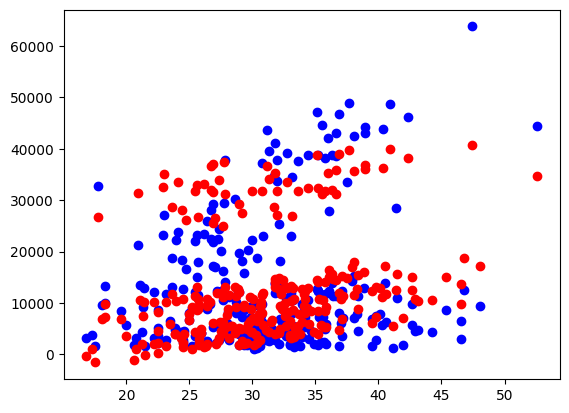

In [19]:
plt.scatter(x_test['bmi'], y_test, color='blue', label='Actual')
plt.scatter(x_test['bmi'], RidgeNewY, color='red', label='Predicted')

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, RidgeNewY)
mse = mean_squared_error(y_test, RidgeNewY)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.7855974810412821
Mean Squared Error: 33285719.09698186
